<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-08-07 14:55:46.160791


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

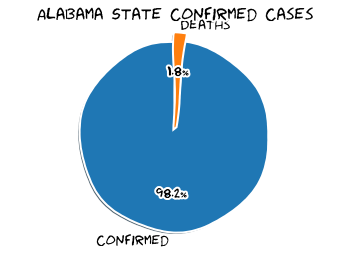

Alabama State Total Population
4887871
Alabama State Confirmed
96592 (1.9761568993944398% of population)
Alabama State Deaths
1714 (1.7744740765280769% of confirmed)



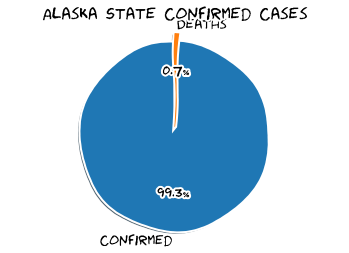

Alaska State Total Population
737438
Alaska State Confirmed
3483 (0.47231089257673187% of population)
Alaska State Deaths
25 (0.7177720356014929% of confirmed)



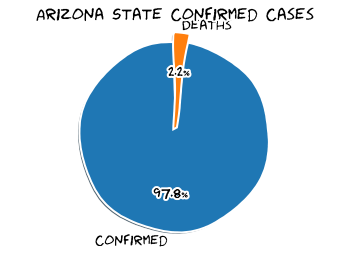

Arizona State Total Population
7171646
Arizona State Confirmed
183656 (2.5608625969547294% of population)
Arizona State Deaths
4001 (2.1785294245763818% of confirmed)



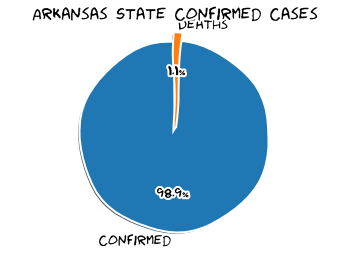

Arkansas State Total Population
3013825
Arkansas State Confirmed
47028 (1.5604091146632602% of population)
Arkansas State Deaths
515 (1.0950922854469678% of confirmed)



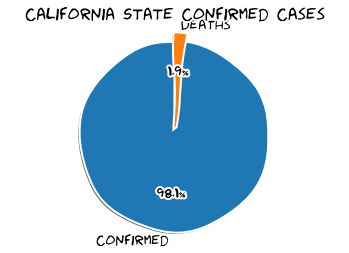

California State Total Population
39557045
California State Confirmed
541492 (1.3688889046186337% of population)
California State Deaths
10024 (1.8511815502352758% of confirmed)



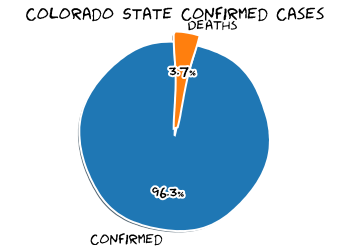

Colorado State Total Population
5695564
Colorado State Confirmed
49418 (0.8676577069452648% of population)
Colorado State Deaths
1852 (3.7476223238496096% of confirmed)



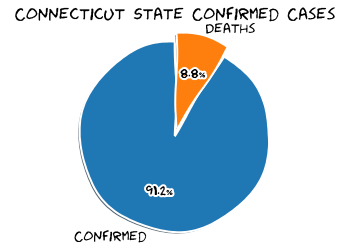

Connecticut State Total Population
3572665
Connecticut State Confirmed
50245 (1.406373113628062% of population)
Connecticut State Deaths
4437 (8.830729425813514% of confirmed)



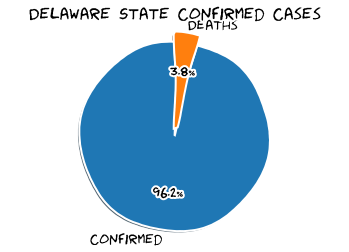

Delaware State Total Population
967171
Delaware State Confirmed
15365 (1.588653919524055% of population)
Delaware State Deaths
587 (3.8203709729905633% of confirmed)



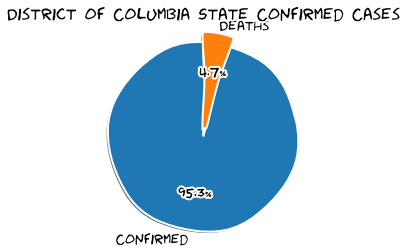

District of Columbia State Total Population
702455
District of Columbia State Confirmed
12589 (1.7921432689638483% of population)
District of Columbia State Deaths
589 (4.678687743267932% of confirmed)



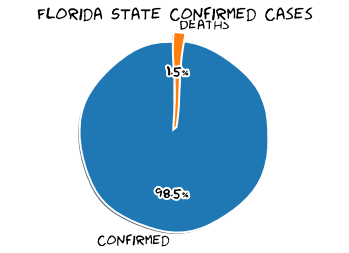

Florida State Total Population
21299325
Florida State Confirmed
510389 (2.396268426346844% of population)
Florida State Deaths
7747 (1.5178618661452343% of confirmed)



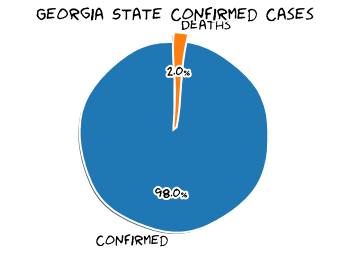

Georgia State Total Population
10519475
Georgia State Confirmed
204895 (1.9477683059278148% of population)
Georgia State Deaths
4026 (1.9649088557553869% of confirmed)



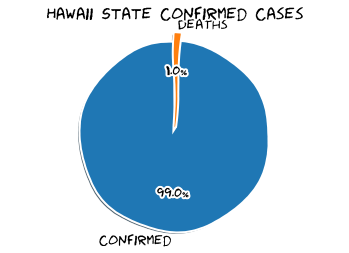

Hawaii State Total Population
1420491
Hawaii State Confirmed
2914 (0.2051403352784354% of population)
Hawaii State Deaths
29 (0.9951956074124915% of confirmed)



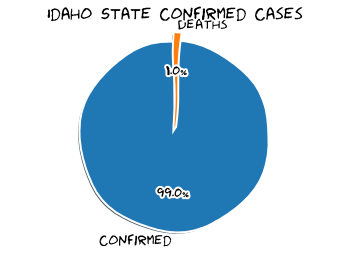

Idaho State Total Population
1754208
Idaho State Confirmed
23401 (1.3339923201809591% of population)
Idaho State Deaths
223 (0.9529507286013418% of confirmed)



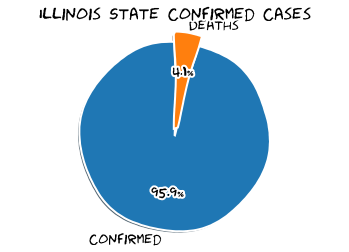

Illinois State Total Population
12741080
Illinois State Confirmed
189705 (1.488924015860508% of population)
Illinois State Deaths
7791 (4.106902822803827% of confirmed)



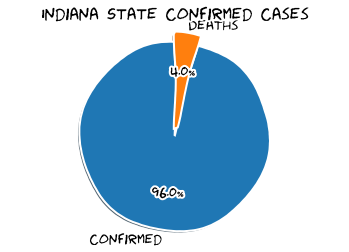

Indiana State Total Population
6691878
Indiana State Confirmed
71015 (1.0612118152781627% of population)
Indiana State Deaths
2811 (3.95831866507076% of confirmed)



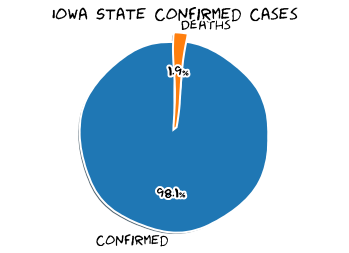

Iowa State Total Population
3156145
Iowa State Confirmed
47729 (1.5122562493168088% of population)
Iowa State Deaths
912 (1.9107879905298664% of confirmed)



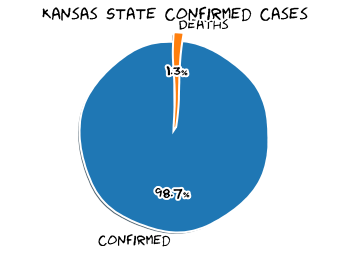

Kansas State Total Population
2911510
Kansas State Confirmed
29621 (1.0173758633836052% of population)
Kansas State Deaths
377 (1.2727456871813916% of confirmed)



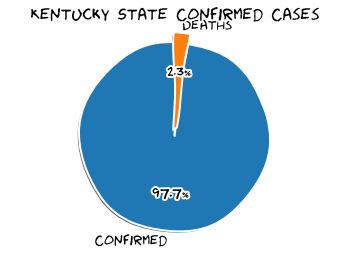

Kentucky State Total Population
4468402
Kentucky State Confirmed
33254 (0.7442034087353824% of population)
Kentucky State Deaths
760 (2.2854393456426294% of confirmed)



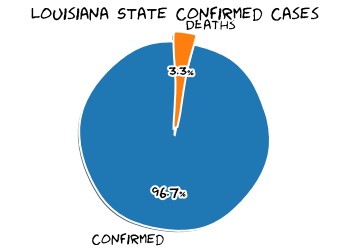

Louisiana State Total Population
4659978
Louisiana State Confirmed
127246 (2.7306137496786462% of population)
Louisiana State Deaths
4146 (3.2582556622605034% of confirmed)



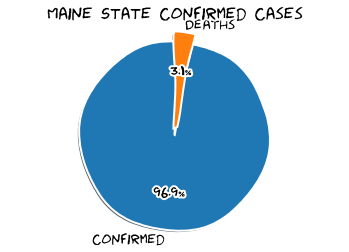

Maine State Total Population
1338404
Maine State Confirmed
4016 (0.3000588760942137% of population)
Maine State Deaths
124 (3.087649402390438% of confirmed)



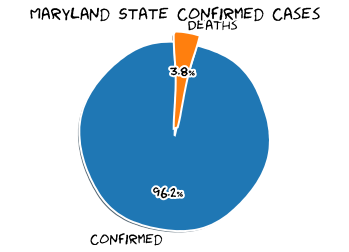

Maryland State Total Population
6042718
Maryland State Confirmed
93805 (1.5523643499498074% of population)
Maryland State Deaths
3546 (3.780182293054741% of confirmed)



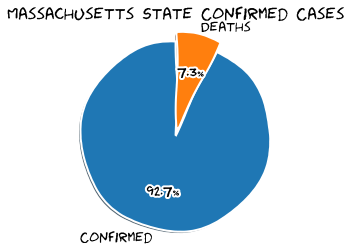

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
119874 (1.736763434113057% of population)
Massachusetts State Deaths
8691 (7.250112618249162% of confirmed)



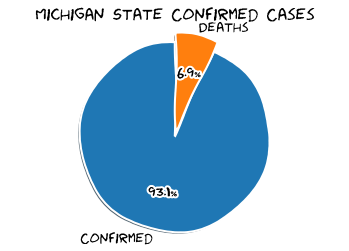

Michigan State Total Population
9995915
Michigan State Confirmed
94656 (0.9469468277791477% of population)
Michigan State Deaths
6506 (6.8733096686950645% of confirmed)



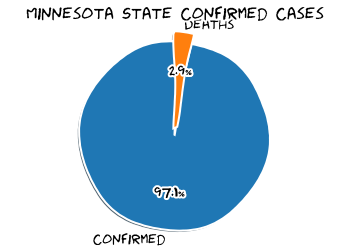

Minnesota State Total Population
5611179
Minnesota State Confirmed
58640 (1.045056662779783% of population)
Minnesota State Deaths
1677 (2.859822646657572% of confirmed)



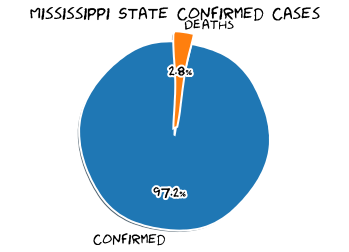

Mississippi State Total Population
2986530
Mississippi State Confirmed
64400 (2.1563486722048664% of population)
Mississippi State Deaths
1825 (2.8338509316770186% of confirmed)



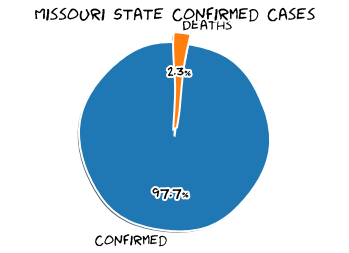

Missouri State Total Population
6126452
Missouri State Confirmed
56974 (0.9299672959161355% of population)
Missouri State Deaths
1311 (2.301049601572647% of confirmed)



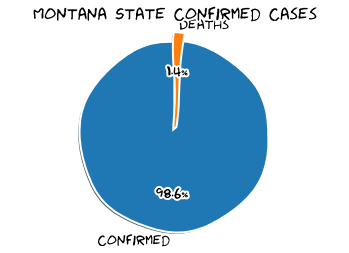

Montana State Total Population
1062305
Montana State Confirmed
4602 (0.43320891834266056% of population)
Montana State Deaths
65 (1.4124293785310735% of confirmed)



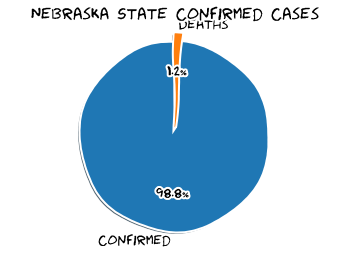

Nebraska State Total Population
1929268
Nebraska State Confirmed
27821 (1.4420495234461983% of population)
Nebraska State Deaths
340 (1.2220984148664678% of confirmed)



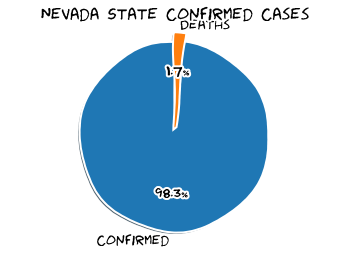

Nevada State Total Population
3034392
Nevada State Confirmed
53557 (1.7649993804360147% of population)
Nevada State Deaths
900 (1.6804526019007786% of confirmed)



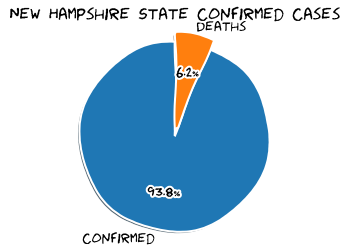

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
6742 (0.49702976428315515% of population)
New Hampshire State Deaths
419 (6.21477306437259% of confirmed)



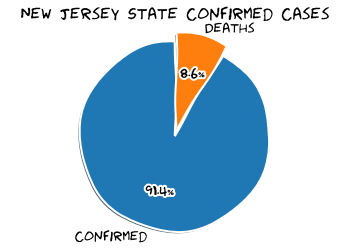

New Jersey State Total Population
8908520
New Jersey State Confirmed
183701 (2.062082141590298% of population)
New Jersey State Deaths
15849 (8.62760681760034% of confirmed)



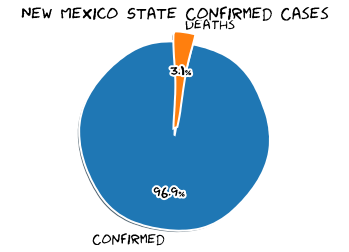

New Mexico State Total Population
2095428
New Mexico State Confirmed
21773 (1.039071731407617% of population)
New Mexico State Deaths
669 (3.0726128691498644% of confirmed)



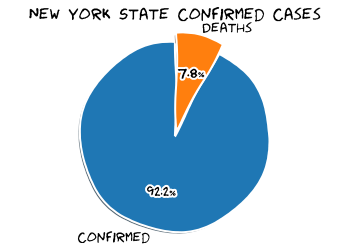

New York State Total Population
19542209
New York State Confirmed
418928 (2.1437085234325353% of population)
New York State Deaths
32756 (7.819004697704618% of confirmed)



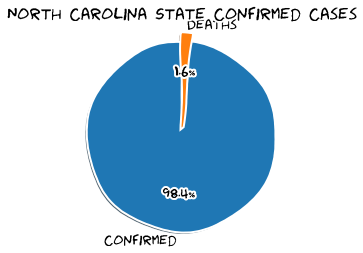

North Carolina State Total Population
10383620
North Carolina State Confirmed
131802 (1.2693261117028551% of population)
North Carolina State Deaths
2126 (1.6130255990045674% of confirmed)



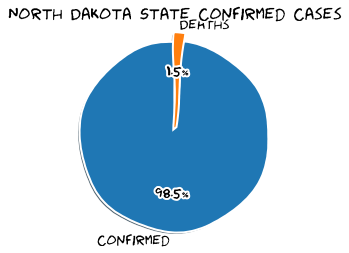

North Dakota State Total Population
760077
North Dakota State Confirmed
7177 (0.944246438189815% of population)
North Dakota State Deaths
109 (1.5187404207886304% of confirmed)



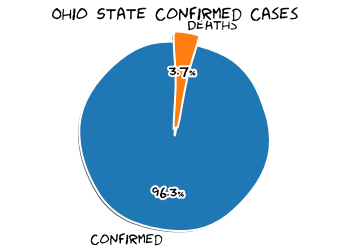

Ohio State Total Population
11689442
Ohio State Confirmed
97471 (0.833837919722772% of population)
Ohio State Deaths
3618 (3.711873275127987% of confirmed)



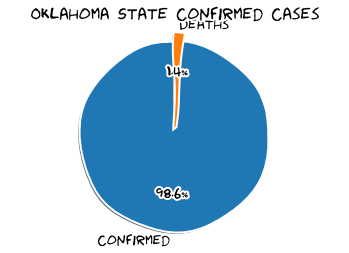

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
41401 (1.0499662826943108% of population)
Oklahoma State Deaths
593 (1.432332552353808% of confirmed)



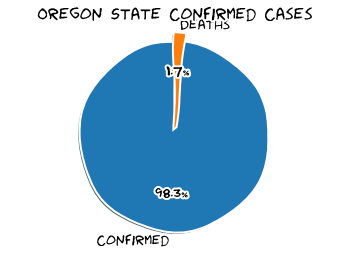

Oregon State Total Population
4190713
Oregon State Confirmed
20224 (0.48259090994778214% of population)
Oregon State Deaths
339 (1.6762262658227847% of confirmed)



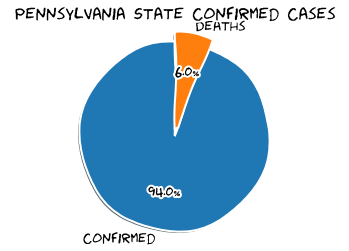

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
121247 (0.9467200122432471% of population)
Pennsylvania State Deaths
7282 (6.0059217960032% of confirmed)



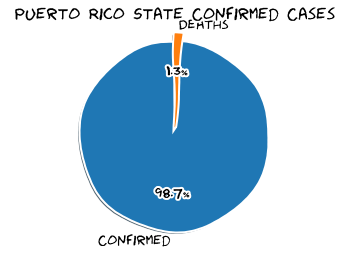

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
20686 (0.647418136158112% of population)
Puerto Rico State Deaths
265 (1.2810596538721841% of confirmed)



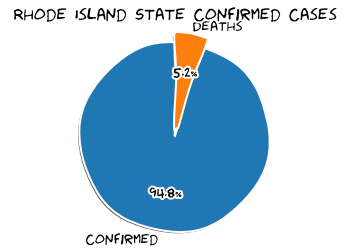

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
19611 (1.8547925641838052% of population)
Rhode Island State Deaths
1014 (5.1705675386262815% of confirmed)



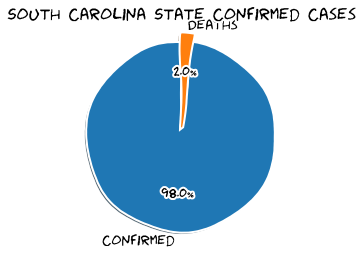

South Carolina State Total Population
5084127
South Carolina State Confirmed
96797 (1.9039060196568653% of population)
South Carolina State Deaths
1942 (2.0062605246030354% of confirmed)



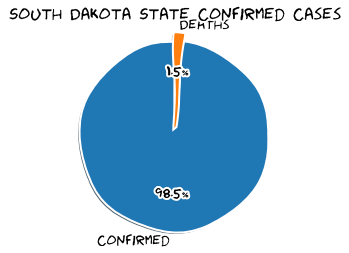

South Dakota State Total Population
882235
South Dakota State Confirmed
9273 (1.0510804944260883% of population)
South Dakota State Deaths
141 (1.5205435134260756% of confirmed)



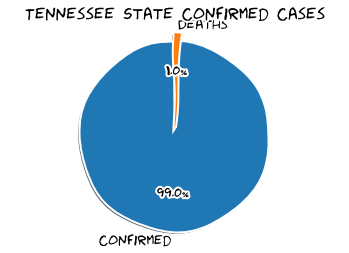

Tennessee State Total Population
6770010
Tennessee State Confirmed
116350 (1.7186089828523148% of population)
Tennessee State Deaths
1186 (1.0193382036957455% of confirmed)



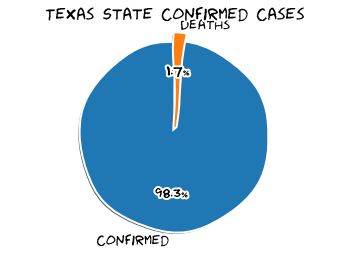

Texas State Total Population
28701845
Texas State Confirmed
484232 (1.6871110550558683% of population)
Texas State Deaths
8331 (1.7204563101984174% of confirmed)



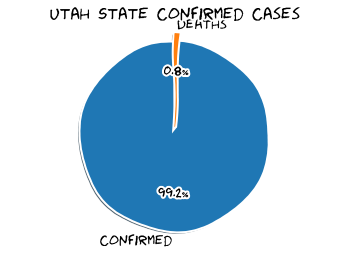

Utah State Total Population
3161105
Utah State Confirmed
42915 (1.3575948916597202% of population)
Utah State Deaths
330 (0.7689619014330654% of confirmed)



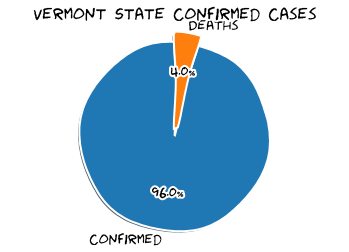

Vermont State Total Population
626299
Vermont State Confirmed
1445 (0.23072047057395906% of population)
Vermont State Deaths
58 (4.013840830449826% of confirmed)



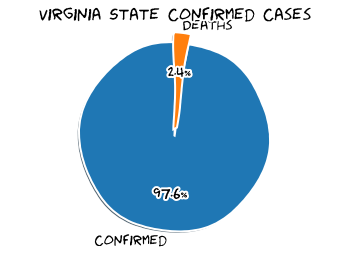

Virginia State Total Population
8517685
Virginia State Confirmed
97729 (1.1473657455047939% of population)
Virginia State Deaths
2316 (2.36981857995068% of confirmed)



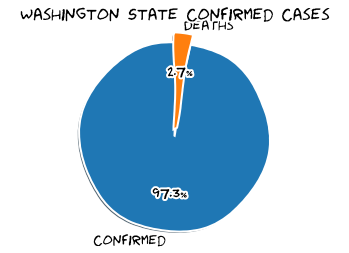

Washington State Total Population
7535591
Washington State Confirmed
60917 (0.8083904766062808% of population)
Washington State Deaths
1653 (2.7135282433475054% of confirmed)



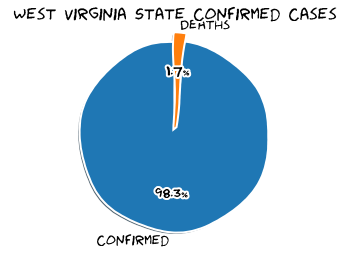

West Virginia State Total Population
1805832
West Virginia State Confirmed
7288 (0.40358128552379186% of population)
West Virginia State Deaths
124 (1.7014270032930843% of confirmed)



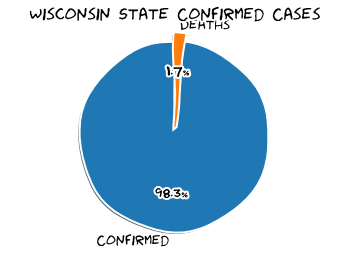

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
57779 (0.9938646972048835% of population)
Wisconsin State Deaths
978 (1.6926565014970838% of confirmed)



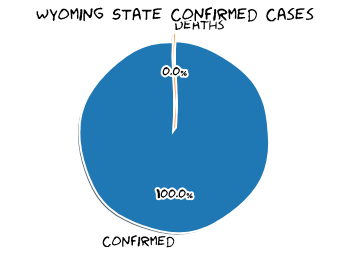

Wyoming State Total Population
577737
Wyoming State Confirmed
2953 (0.5111322279860906% of population)
Wyoming State Deaths
1 (0.033863867253640365% of confirmed)



In [10]:
for i in states:
    state_details(i)

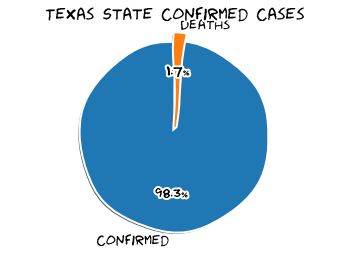

Texas State Total Population
28701845
Texas State Confirmed
484232 (1.6871110550558683% of population)
Texas State Deaths
8331 (1.7204563101984174% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
4887934
US Deaths
159669

New York City Confirmed
226914
New York City Deaths
23563

Philippines Confirmed
122754
Philippines Deaths
2168



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 19135088},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 715681},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-08-07T14:35:01.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 11597912},
 'source': 'https://github.com/mathdroid/covid19'}

In [14]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-08-07 04:35:11,34.22333378,-82.46170658,313,8,0,305,"Abbeville, South Carolina, US",1276.1446569087132,2.5559105431309903
1,22001,Acadia,Louisiana,US,2020-08-07 04:35:11,30.295064899999996,-92.41419698,2555,79,0,2476,"Acadia, Louisiana, US",4117.978886292207,3.091976516634051
2,51001,Accomack,Virginia,US,2020-08-07 04:35:11,37.76707161,-75.63234615,1085,16,0,1069,"Accomack, Virginia, US",3357.4699839088994,1.4746543778801844
3,16001,Ada,Idaho,US,2020-08-07 04:35:11,43.4526575,-116.24155159999998,8569,72,0,8497,"Ada, Idaho, US",1779.3254386019555,0.8402380674524449
4,19001,Adair,Iowa,US,2020-08-07 04:35:11,41.33075609,-94.47105874,27,0,0,27,"Adair, Iowa, US",377.51677852349,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,90023,Unassigned,Maine,US,2020-08-04 12:34:49,,,2,0,0,2,"Unassigned, Maine, US",,0.0
3936,,,Unknown,Colombia,2020-07-17 22:34:48,,,0,0,0,0,"Unknown, Colombia",,
3937,,,Grand Princess,Canada,2020-07-13 12:34:33,,,13,0,13,0,"Grand Princess, Canada",,0.0
3938,16061,Lewis,Idaho,US,2020-07-10 02:34:22,46.23315327,-116.434146,1,0,0,1,"Lewis, Idaho, US",26.055237102657642,0.0


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1596810901000,40.767273,-73.971526,226914,0,23563,203351,New York City,36061,"New York City, New York, US",2721.830166,None,None,84036061,USA
1,California,US,1596810901000,34.308284,-118.228241,201200,0,4869,196331,Los Angeles,06037,"Los Angeles, California, US",2004.162322,None,None,84006037,USA
2,Florida,US,1596810901000,25.611236,-80.551706,127677,0,1784,125893,Miami-Dade,12086,"Miami-Dade, Florida, US",4699.294059,None,None,84012086,USA
3,Arizona,US,1596810901000,33.348359,-112.491815,124022,0,2259,121763,Maricopa,04013,"Maricopa, Arizona, US",2765.006753,None,None,84004013,USA
4,Illinois,US,1596810901000,41.841448,-87.816588,109150,0,4912,104238,Cook,17031,"Cook, Illinois, US",2119.321592,None,None,84017031,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,Montana,US,1596810901000,45.396177,-105.636738,1,0,0,1,Powder River,30075,"Powder River, Montana, US",59.453032,None,None,84030075,USA
3205,Montana,US,1596810901000,46.860480,-105.379384,1,0,0,1,Prairie,30079,"Prairie, Montana, US",92.850511,None,None,84030079,USA
3206,South Dakota,US,1596810901000,44.715718,-100.127809,1,0,0,1,Sully,46119,"Sully, South Dakota, US",71.890726,None,None,84046119,USA
3207,Nebraska,US,1596810901000,41.913590,-100.555663,1,0,0,1,Thomas,31171,"Thomas, Nebraska, US",138.504155,None,None,84031171,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1596810901000,40.767273,-73.971526,226914,0,23563,203351,New York City,36061,"New York City, New York, US",2721.830166,None,None,84036061,USA
9,New York,US,1596810901000,40.883201,-72.801217,43630,0,1998,41632,Suffolk,36103,"Suffolk, New York, US",2954.758936,None,None,84036103,USA
10,New York,US,1596810901000,40.740665,-73.589419,43534,0,2194,41340,Nassau,36059,"Nassau, New York, US",3208.285799,None,None,84036059,USA
14,New York,US,1596810901000,41.162784,-73.757417,36107,0,1447,34660,Westchester,36119,"Westchester, New York, US",3731.966520,None,None,84036119,USA
62,New York,US,1596810901000,41.150279,-74.025605,13918,0,674,13244,Rockland,36087,"Rockland, New York, US",4272.090218,None,None,84036087,USA
84,New York,US,1596810901000,41.403375,-74.302408,11127,0,491,10636,Orange,36071,"Orange, New York, US",2890.580350,None,None,84036071,USA
115,New York,US,1596810901000,42.762490,-78.730637,8737,0,671,8066,Erie,36029,"Erie, New York, US",951.015672,None,None,84036029,USA
193,New York,US,1596810901000,43.146389,-77.693229,4868,0,285,4583,Monroe,36055,"Monroe, New York, US",656.268115,None,None,84036055,USA
208,New York,US,1596810901000,41.764861,-73.743567,4582,0,153,4429,Dutchess,36027,"Dutchess, New York, US",1557.348633,None,None,84036027,USA
250,New York,US,1596810901000,43.004919,-76.199712,3535,0,200,3335,Onondaga,36067,"Onondaga, New York, US",767.597193,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

418928

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1596810901000,40.767273,-73.971526,226914,0,23563,203351,New York City,36061,"New York City, New York, US",2721.830166,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
30,None,Philippines,1596810901000,12.879721,121.774017,122754,66852,2168,53734.0,None,None,Philippines,112.021158,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
